In [70]:
#Dependencies 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [71]:
# Load datasets
# census_data = pd.read_csv('..''Resources'') 
## ^^ this will become API right? -natalie 
median_prices_all = pd.read_csv("median_sales_price_all.csv")
median_prices_sfr = pd.read_csv("median_sales_price_sfr.csv")

# Display the first few rows of each dataset
median_prices_all.head()
median_prices_sfr.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
0,102001,0,United States,country,NaN,226983.0,226453.0,226900.0,227722.0,228611.0,...,340596.0,341490.0,341300.0,341096.0,338428.0,336115.0,335908.0,340182.0,346301.0,351705.0
1,394913,1,"New York, NY",msa,NY,398221.0,395131.0,394984.0,396389.0,396502.0,...,582875.0,594256.0,596951.0,600207.0,599063.0,602948.0,605790.0,607938.0,611763.0,617557.0
2,753899,2,"Los Angeles, CA",msa,CA,674017.0,670442.0,670479.0,668989.0,663778.0,...,887388.0,905324.0,914676.0,920513.0,922876.0,920292.0,917638.0,922305.0,932421.0,949769.0
3,394463,3,"Chicago, IL",msa,IL,230544.0,229369.0,229997.0,232445.0,231988.0,...,296368.0,301159.0,302767.0,302285.0,300267.0,299301.0,300763.0,302937.0,306699.0,310235.0
4,394514,4,"Dallas, TX",msa,TX,258652.0,254302.0,251613.0,251635.0,252011.0,...,388234.0,389270.0,387314.0,384480.0,383918.0,382263.0,383195.0,384607.0,389400.0,391458.0


In [72]:
# We only want to look at Nashville
med_prices_all = median_prices_all[median_prices_all["RegionName"] == "Nashville, TN"]
med_prices_sfr = median_prices_sfr[median_prices_sfr["RegionName"] == "Nashville, TN"]

In [73]:
# Get summary statistics
med_prices_all.info()
med_prices_sfr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 36 to 36
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1 non-null      int64  
 1   SizeRank    1 non-null      int64  
 2   RegionName  1 non-null      object 
 3   RegionType  1 non-null      object 
 4   StateName   1 non-null      object 
 5   2018-08-31  1 non-null      float64
 6   2018-09-30  1 non-null      float64
 7   2018-10-31  1 non-null      float64
 8   2018-11-30  1 non-null      float64
 9   2018-12-31  1 non-null      float64
 10  2019-01-31  1 non-null      float64
 11  2019-02-28  1 non-null      float64
 12  2019-03-31  1 non-null      float64
 13  2019-04-30  1 non-null      float64
 14  2019-05-31  1 non-null      float64
 15  2019-06-30  1 non-null      float64
 16  2019-07-31  1 non-null      float64
 17  2019-08-31  1 non-null      float64
 18  2019-09-30  1 non-null      float64
 19  2019-10-31  1 non-null      float64


In [74]:
# Check for missing values
med_prices_all.isnull().sum()
med_prices_sfr.isnull().sum()
med_prices_all.dropna()
med_prices_sfr.dropna()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
36,394902,37,"Nashville, TN",msa,TN,259825.0,256433.0,257245.0,256790.0,258817.0,...,411306.0,414338.0,416883.0,418967.0,419458.0,416740.0,419725.0,422760.0,430412.0,434238.0


In [75]:
# shaping data to be able to add to it later
med_prices= med_prices_all.T
med_prices = med_prices.reset_index()

#dropping identifiers because we know we're only looking at nashville 
med_prices = med_prices.drop(med_prices.index[:5])

#renaming columns 
med_prices.rename(columns={36:'monthly_med_prices'}, inplace =True)
med_prices.rename(columns={'index':'dates'}, inplace =True)

med_prices.head()
# med_prices_t.columns

,dates,monthly_med_prices
5,2018-08-31,256243.0
6,2018-09-30,252518.0
7,2018-10-31,253058.0
8,2018-11-30,252506.0
9,2018-12-31,255555.0


In [76]:
#Doing the same to SFR 
prices_sfr = med_prices_sfr.T
prices_sfr = prices_sfr.reset_index()
prices_sfr = prices_sfr.drop(prices_sfr.index[:5])

prices_sfr.rename(columns={36:'sfr_monthly_med_prices'}, inplace =True)
prices_sfr.rename(columns={'index':'dates'}, inplace =True)

prices_sfr.head()

,dates,sfr_monthly_med_prices
5,2018-08-31,259825.0
6,2018-09-30,256433.0
7,2018-10-31,257245.0
8,2018-11-30,256790.0
9,2018-12-31,258817.0


In [77]:
# merging so we have nashville median prices for all and for single family rentalls in one place 
# this is only possible because zillow collects data at the same time for both 
med_prices = pd.merge(med_prices, prices_sfr, on='dates')
med_prices.head()

,dates,monthly_med_prices,sfr_monthly_med_prices
0,2018-08-31,256243.0,259825.0
1,2018-09-30,252518.0,256433.0
2,2018-10-31,253058.0,257245.0
3,2018-11-30,252506.0,256790.0
4,2018-12-31,255555.0,258817.0


In [79]:
#Finding the rate of change of median sales prices 
med_prices['rate_of_change_all'] = (med_prices['monthly_med_prices'] - med_prices['monthly_med_prices'].shift(1))/ med_prices['monthly_med_prices'].shift(1) * 100
med_prices['rate_of_change_sfr'] = (med_prices['sfr_monthly_med_prices'] - med_prices['sfr_monthly_med_prices'].shift(1))/ med_prices['sfr_monthly_med_prices'].shift(1) * 100
med_prices.head()


,dates,monthly_med_prices,sfr_monthly_med_prices,rate_of_change_all,rate_of_change_sfr
0,2018-08-31,256243.0,259825.0,NaN,NaN
1,2018-09-30,252518.0,256433.0,-1.453698,-1.305494
2,2018-10-31,253058.0,257245.0,0.213846,0.316652
3,2018-11-30,252506.0,256790.0,-0.218132,-0.176874
4,2018-12-31,255555.0,258817.0,1.207496,0.789361


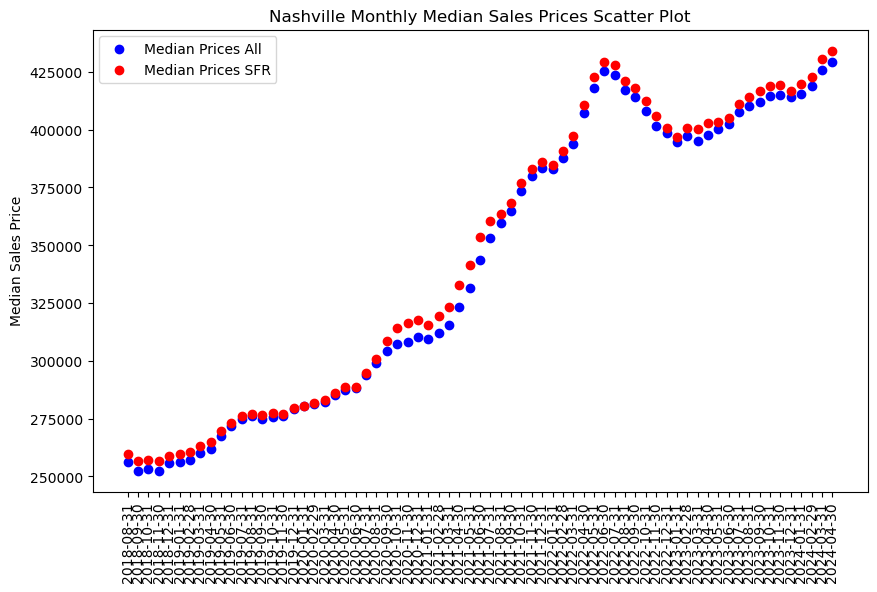

In [84]:
#scatter plot of the median sales prices and med sales prices for single family rentals
dates = med_prices_t['dates']


plt.figure(figsize=(10,6))
plt.scatter(dates, med_prices['monthly_med_prices'], color = 'blue', marker = 'o', label = "Median Prices All")
plt.scatter(dates, med_prices['sfr_monthly_med_prices'], color = 'red', marker = 'o', label = "Median Prices SFR")
plt.title('Nashville Monthly Median Sales Prices Scatter Plot')
plt.ylabel('Median Sales Price')
plt.xticks(rotation = 90)
plt.legend()
# plt.grid(True)


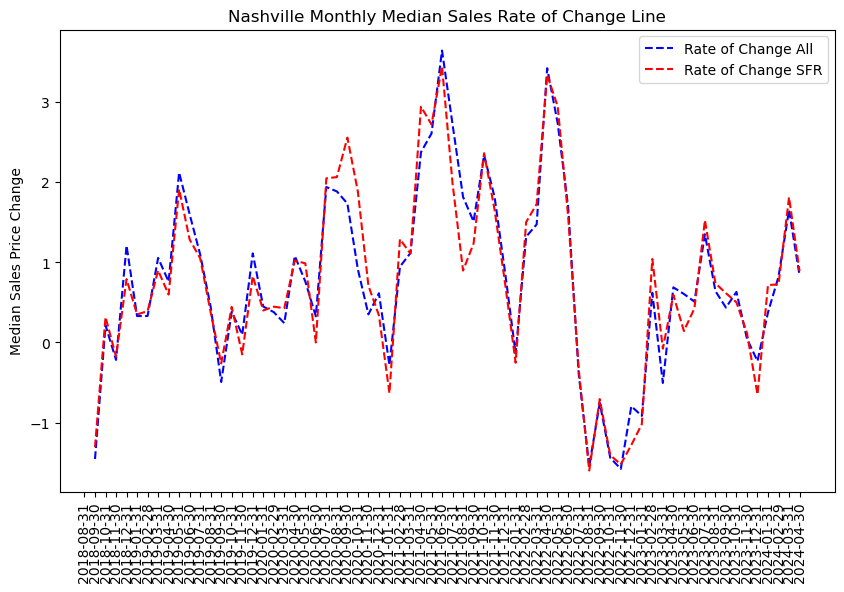

In [89]:
#line plot of the rate of change 
plt.figure(figsize=(10,6))
plt.plot(dates, med_prices['rate_of_change_all'], color = 'blue', linestyle = '--', label = 'Rate of Change All')
plt.plot(dates, med_prices['rate_of_change_sfr'], color = 'red', linestyle = '--', label = 'Rate of Change SFR')
plt.title('Nashville Monthly Median Sales Rate of Change Line')
plt.ylabel('Median Sales Price Change')
plt.xticks(rotation = 90)
plt.legend()

AttributeError: 'Axes' object has no attribute 'xticks'

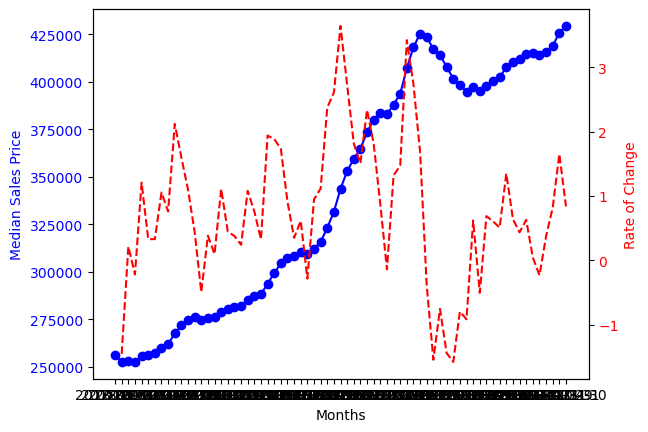

In [92]:
gif, ax1 = plt.subplots()
#Median sales price scatter 
ax1.plot(dates, med_prices['monthly_med_prices'], color = 'blue', marker = 'o', label = "Median Prices All")
ax1.set_xlabel('Months')
ax1.set_ylabel('Median Sales Price', color = 'blue')
ax1.tick_params(axis='y', labelcolor = 'blue')

#Rate of change line 
ax2 = ax1.twinx()
ax2.plot(dates, med_prices['rate_of_change_all'], color = 'red', linestyle = '--', label = 'Rate of Change All')
ax2.set_ylabel('Rate of Change', color = 'red')
ax2.tick_params(axis='y', labelcolor = 'red')


In [ ]:
# Example cleaning steps (these will vary based on actual data issues found)

# Handle missing values (e.g., drop rows with missing target values)
real_estate_data = real_estate_data.dropna(subset=['price'])

# Convert date columns to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Standardize numerical formats
census_data['income'] = census_data['income'].astype(float)

# Filter data for Nashville metro area
nashville_data = real_estate_data[real_estate_data['metro_area'] == 'Nashville']

In [ ]:
# Merge datasets on common keys
merged_data = pd.merge(nashville_data, census_data, on='common_key')
merged_data = pd.merge(merged_data, sales_data, on='common_key')

# Verify the merged dataset
merged_data.head()
merged_data.info()